# FIFA 선수 이적료 예측

### https://dacon.io/competitions/open/235538/overview/description

- id : 선수 고유의 아이디
- name : 이름
- age : 나이
- continent : 선수들의 국적이 포함되어 있는 대륙입니다
- contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
- position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
- prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
- reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
- stat_overall : 선수의 현재 능력치 입니다.
- stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
- stat_skill_moves : 선수의 개인기 능력치 입니다.
- value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다.

## [1] 데이터 로딩

In [3]:
# 모듈 로딩
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 파일 불러오기
fifaDF = pd.read_csv('C:/Users/ss/Desktop/11주_4조/data/FIFA_train.csv', encoding='utf-8')
fifaDF_test = pd.read_csv('C:/Users/ss/Desktop/11주_4조/data/FIFA_test.csv', encoding='utf-8')

In [5]:
fifaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


## [2] 데이터 전처리

### 상관관계 분석 - reputation, stat_overall

In [6]:
fifaDF.corr().style.background_gradient(cmap='Blues_r')

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,1.000000,-0.475785,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280
age,-0.475785,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,-0.423739,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,-0.972374,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.630199,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,-0.402455,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,-0.544280,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


In [7]:
# 필요없는 데이터 삭제
fifaDF = fifaDF.iloc[:,2:]
fifaDF_test = fifaDF_test.iloc[:,2:]
fifaDF.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [8]:
# 계약기간 값 정렬
fifaDF.contract_until.value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [9]:
# 계약 연도만 추출
fifaDF['contract_until'] = fifaDF['contract_until'].map(lambda x : x[-4:])
fifaDF_test['contract_until'] = fifaDF_test['contract_until'].map(lambda x : x[-4:])

In [10]:
fifaDF['contract_until'].unique()

array(['2021', '2020', '2019', '2023', '2022', '2024', '2026', '2018',
       '2025'], dtype=object)

In [11]:
fifaDF.info(), fifaDF_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   object 
 2   contract_until    8932 non-null   object 
 3   position          8932 non-null   object 
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 697.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               3828 non-null   int64 
 1   continent       

(None, None)

### 라벨 인코더

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [13]:
le = LabelEncoder()

for column_name in fifaDF.columns:
    if fifaDF[column_name].dtype == object:
        fifaDF[column_name] = le.fit_transform(fifaDF[column_name])
    else:
        pass
    
for column_name in fifaDF_test.columns:
    if fifaDF_test[column_name].dtype == object:
        fifaDF_test[column_name] = le.fit_transform(fifaDF_test[column_name])
    else:
        pass

In [14]:
fifaDF.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,4,3,3,0,5.0,94,94,4.0,110500000.0
1,27,2,2,1,1,4.0,91,93,1.0,72000000.0
2,31,4,3,3,1,5.0,91,91,3.0,80000000.0
3,32,2,2,0,1,4.0,91,91,3.0,51000000.0
4,25,2,3,1,1,3.0,90,93,1.0,68000000.0


### train, test div

In [15]:
# data, target 분리
data = fifaDF.iloc[:,:-1]
target = fifaDF.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

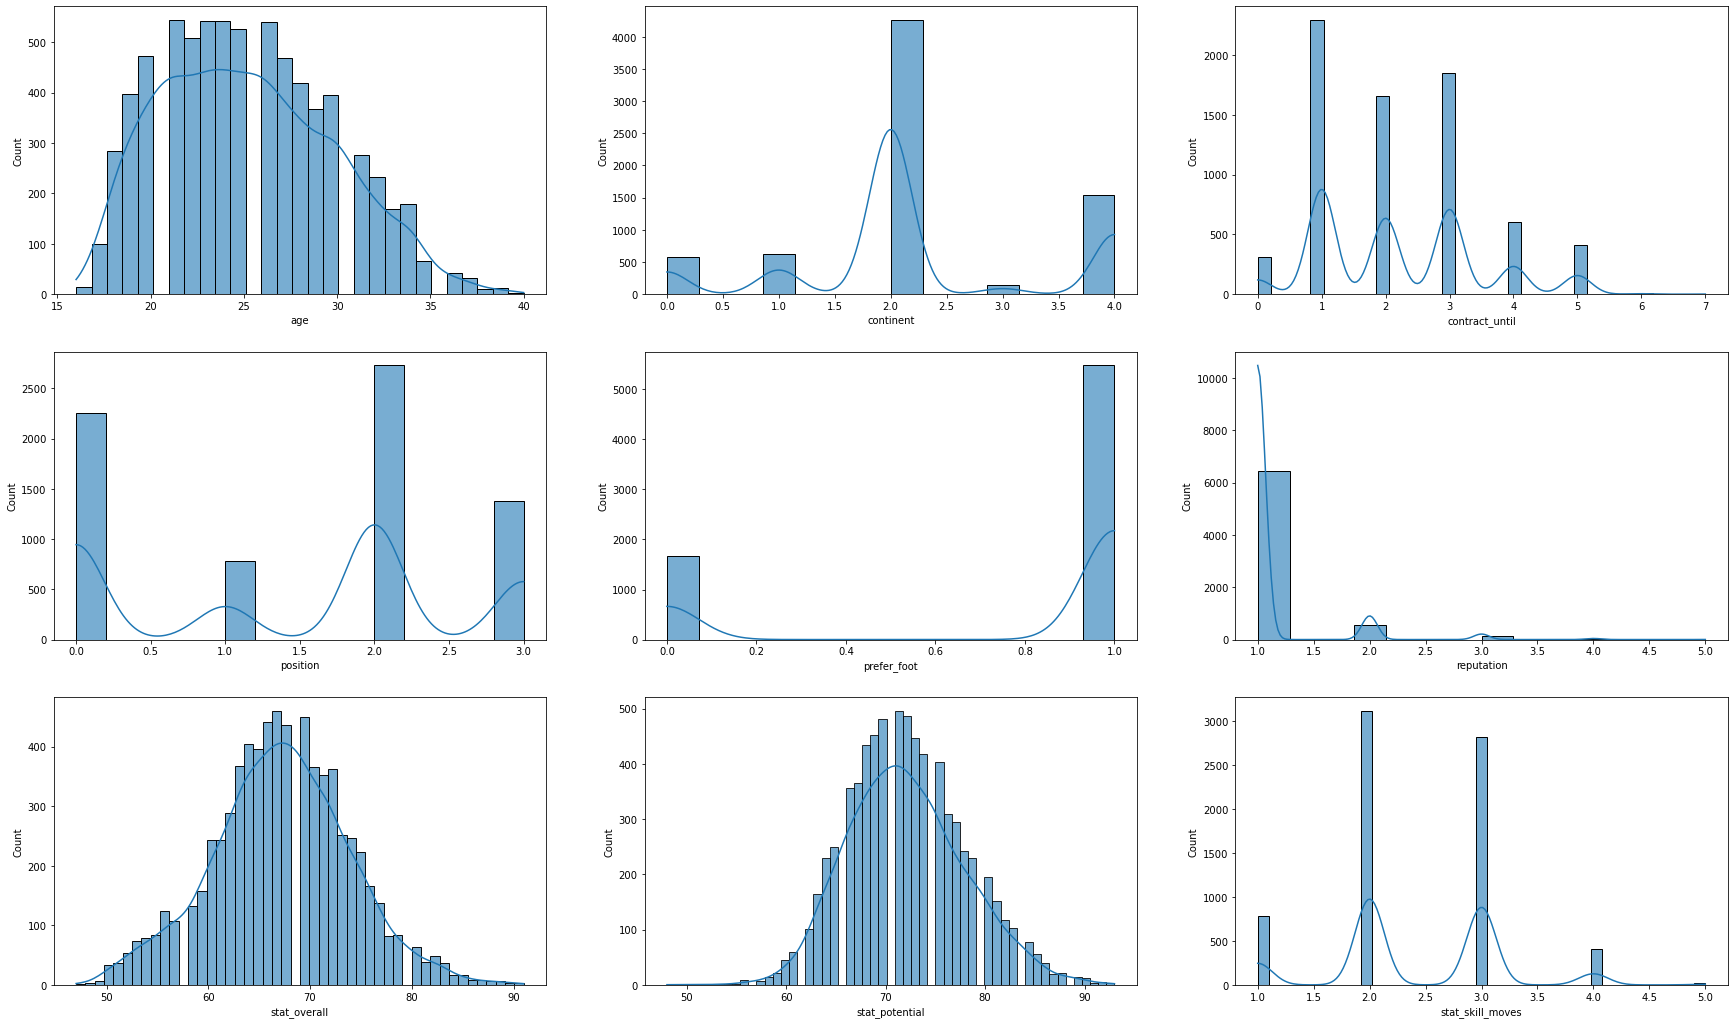

In [507]:
# 분포도
f, axes = plt.subplots(3,3, figsize=(30,18)) 
axes = axes.flatten()
for col,ax in zip(train_input.columns, axes):
    sns.histplot(data = train_input, x=col, ax=ax, alpha=0.6, kde=True)
plt.show()

In [18]:
train_input = train_input.to_numpy()
test_input = test_input.to_numpy()

### 스케일링

In [19]:
ss = StandardScaler()
ss.fit(train_input)
train_input_scaled = ss.fit_transform(train_input)
test_input_scaled = ss.transform(test_input)

## [3] all_estimators 모든 모델 확인

In [282]:
from sklearn.utils import all_estimators

In [77]:
models = all_estimators(type_filter='regressor')

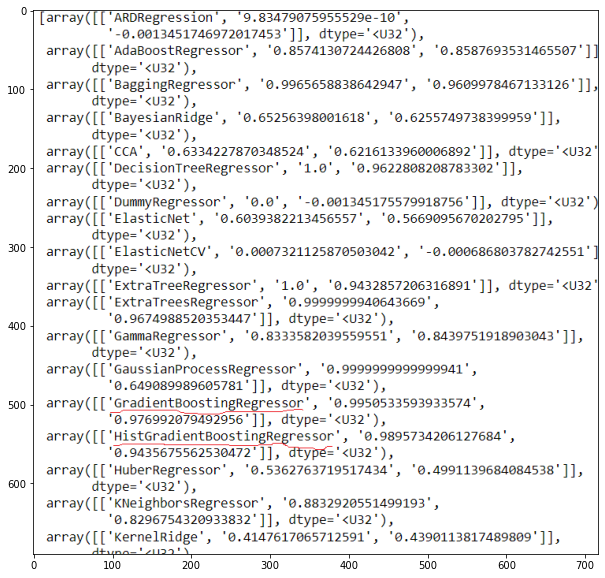

In [591]:
img_color = plt.imread('C:/Users/ss/Desktop/11주_4조/data/모델score1.PNG')
plt.figure(figsize=(20,10))
plt.imshow(img_color)
plt.show()

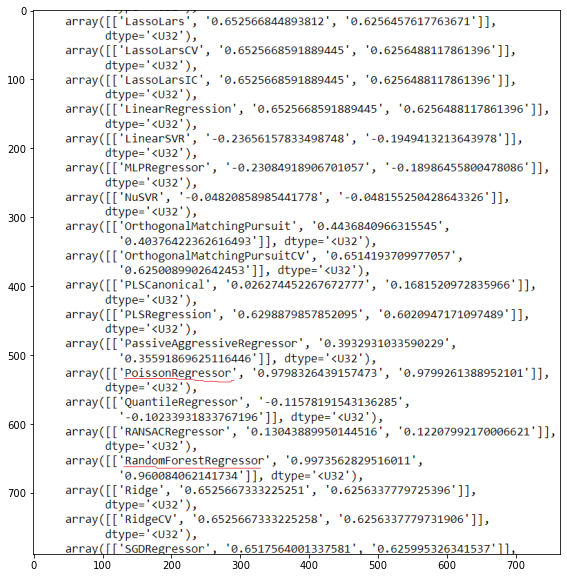

In [590]:
img_color1 = plt.imread('C:/Users/ss/Desktop/11주_4조/data/모델score2.PNG')
plt.figure(figsize=(20,10))
plt.imshow(img_color1)
plt.show()

- GradientBoostingRegressor
- RandomForestRegressor
- HistGradientBoostingRegressor
- PoissonRegressor

## [4] 모델 생성

### [4]-1 GradientBoostingRegressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [36]:
gbr = GradientBoostingRegressor()

In [37]:
gbr.fit(train_input_scaled,train_target)

GradientBoostingRegressor()

In [38]:
print(gbr.score(train_input_scaled, train_target))
print(gbr.score(test_input_scaled, test_target))

0.9950397170143624
0.9764792744763344


### 모델 튜닝

In [39]:
param_grid = {'learning_rate' : [0.01, 0.1, 1, 10],
              'n_estimators' : [100, 500, 1000]}

In [40]:
grid_search = GridSearchCV(gbr, param_grid, cv=5, return_train_score=True)

In [41]:
grid_search.fit(train_input_scaled, train_target)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeW

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeW

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\ProgramData\Anaconda3\lib\site-packages\sk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred =

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [100, 500, 1000]},
             return_train_score=True)

In [42]:
# 최적 test 값
print(f'best score :', grid_search.best_score_)
print(f'best parameter :', grid_search.best_params_)

best score : 0.9868154548575232
best parameter : {'learning_rate': 0.1, 'n_estimators': 500}


In [43]:
gbrmodel = grid_search.best_estimator_
print(f'train score :', gbrmodel.score(train_input_scaled, train_target))
print(f'test score :', gbrmodel.score(test_input_scaled, test_target))

train score : 0.9982822028016953
test score : 0.9797997579075167


In [44]:
# test data 스케일링
test = ss.transform(fifaDF_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [45]:
# test data predict
result = grid_search.best_estimator_
result_gbr = result.predict(test)

In [46]:
sub = pd.read_csv('C:/Users/ss/Desktop/11주_4조/data/submission.csv', encoding='utf-8')

In [47]:
sub['value'] = result_gbr

In [48]:
sub.head()

,id,value
0,1,6.334366e+07
1,2,8.864111e+07
2,4,7.650279e+07
3,5,7.992102e+07
4,6,6.586238e+07


In [412]:
sub.to_csv('gbr모델.csv',index = False)

### [4]-2 RandomForestRegressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rfr = RandomForestRegressor()

In [22]:
rfr.fit(train_input_scaled, train_target)

RandomForestRegressor()

In [23]:
print(rfr.score(train_input_scaled, train_target))
print(rfr.score(test_input_scaled, test_target))

0.9976763789413161
0.9626689233827989


In [24]:
rfr.feature_importances_

array([3.04323836e-02, 1.08539216e-03, 1.53456561e-03, 1.04157164e-02,
       5.81218675e-04, 1.41668062e-03, 8.48253565e-01, 1.00933192e-01,
       5.34728568e-03])

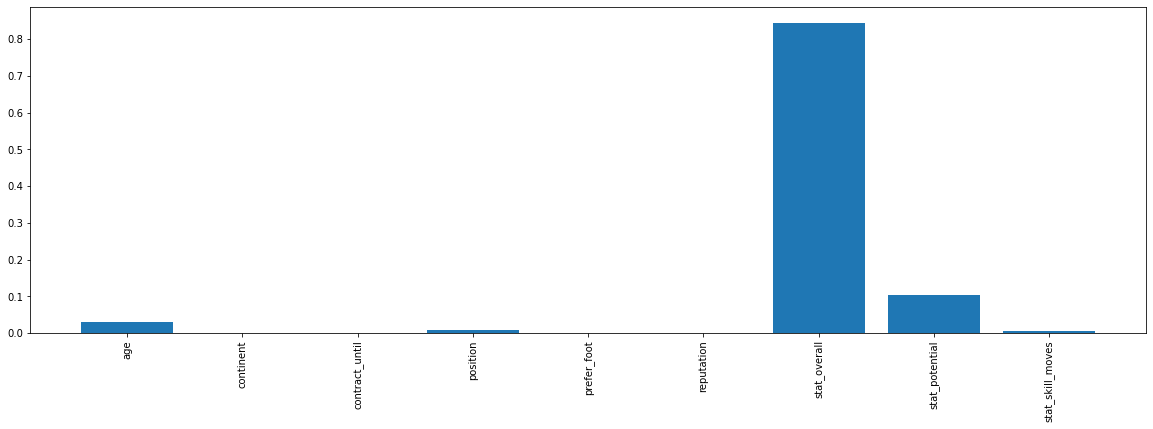

In [512]:
plt.figure(figsize=(20,6))
plt.bar(fifaDF_test.columns,rfr.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

### 모델 튜닝

In [417]:
param_grid2 = {'max_depth' : [5, 10, 15],
               'n_estimators' : [100, 300, 500],
               'max_features' : [1, 2, 3]}              

In [524]:
grid_search_rfr = GridSearchCV(rfr, param_grid2, cv=3, return_train_score=True)

In [526]:
grid_search_rfr.fit(train_input_scaled, train_target)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             return_train_score=True)

In [420]:
print(pd.DataFrame(grid_search_rfr.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.123911      0.007224         0.011141        0.003387   
1        0.358038      0.003651         0.039780        0.001852   
2        0.585660      0.005429         0.065607        0.002887   
3        0.141132      0.001906         0.010966        0.000982   
4        0.410812      0.000406         0.040473        0.000380   
5        0.694038      0.008026         0.064579        0.003510   
6        0.163693      0.000314         0.010314        0.000771   
7        0.479103      0.004311         0.038243        0.002020   
8        0.801068      0.006372         0.063766        0.003787   
9        0.170065      0.003366         0.024865        0.003178   
10       0.506115      0.002953         0.071595        0.001003   
11       0.847965      0.002522         0.120252        0.004015   
12       0.206743      0.003712         0.028338        0.003433   
13       0.628677      0.002636         0.071838

In [527]:
grid_search_rfr.best_params_

{'max_depth': 15, 'max_features': 3, 'n_estimators': 500}

In [528]:
rfrmodel = grid_search_rfr.best_estimator_

15

In [439]:
print(f'train score :', rfrmodel.score(train_input_scaled, train_target))
print(f'test score :', rfrmodel.score(test_input_scaled, test_target))

train score : 0.9966820773860845
test score : 0.9494844847543982


In [425]:
result_rfr = rfrmodel.predict(test)
result_rfr

array([5.52466667e+07, 6.77300000e+07, 6.27066667e+07, ...,
       6.81825462e+04, 6.78539056e+04, 6.58369903e+04])

In [426]:
sub2 = pd.read_csv('C:/Users/ss/Desktop/11주_4조/data/submission.csv', encoding='utf-8')

In [427]:
sub2['value'] = result_rfr

In [428]:
sub.to_csv('rfr모델.csv',index = False)

In [703]:
sub2.head()

,id,value
0,1,1.522140e+08
1,2,1.669870e+08
2,4,1.264825e+08
3,5,1.369360e+08
4,6,8.821909e+07


### [4]-3 HistGradientBoostingRegressor

In [429]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [430]:
hgbr = HistGradientBoostingRegressor()

In [431]:
hgbr.fit(train_input_scaled, train_target)

HistGradientBoostingRegressor()

In [480]:
print(hgbr.score(train_input_scaled, train_target))
print(hgbr.score(test_input_scaled, test_target))

0.9899711815857565
0.9447802611858556


### 모델 튜닝

In [481]:
param_grid3 = {'learning_rate' : [0.01, 0.01, 0.1, 1, 10],
              'max_iter' : [10, 100, 500, 1000],
              'n_iter_no_change' : [5, 10, 20, 30],
              'max_leaf_nodes' : [31, 41, 51, 61]}

In [482]:
grid_search_hgbr = GridSearchCV(hgbr, param_grid3, cv=5, return_train_score=True)

In [483]:
grid_search_hgbr.fit(train_input_scaled, train_target)

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.01, 0.1, 1, 10],
                         'max_iter': [10, 100, 500, 1000],
                         'max_leaf_nodes': [31, 41, 51, 61],
                         'n_iter_no_change': [5, 10, 20, 30]},
             return_train_score=True)

In [486]:
# 최적 test 값
print(f'best score :', grid_search_hgbr.best_score_)
print(f'best parameter :', grid_search_hgbr.best_params_)

best score : 0.9858040787820899
best parameter : {'learning_rate': 0.1, 'max_iter': 500, 'max_leaf_nodes': 41, 'n_iter_no_change': 5}


In [487]:
hgbrmodel = grid_search_hgbr.best_estimator_
print(f'train score :', hgbrmodel.score(train_input_scaled, train_target))
print(f'test score :', hgbrmodel.score(test_input_scaled, test_target))

train score : 0.9968731015246364
test score : 0.9638201760264634


In [698]:
result_hgbr = hgbrmodel.predict(test)

In [697]:
sub3 = pd.read_csv('C:/Users/ss/Desktop/11주_4조/data/submission.csv', encoding='utf-8')

In [699]:
sub3['value'] = result_hgbr

In [704]:
sub3.to_csv('hgbr모델.csv',index = False)

In [705]:
sub3.head()

,id,value
0,1,6.180926e+07
1,2,7.120670e+07
2,4,6.840027e+07
3,5,7.213838e+07
4,6,6.151871e+07


### [4]-4 PoissonRegressor

In [468]:
from sklearn.linear_model import PoissonRegressor

In [469]:
pr = PoissonRegressor()
pr.fit(train_input_scaled, train_target)

PoissonRegressor()

In [470]:
print(pr.score(train_input_scaled, train_target))
print(pr.score(test_input_scaled, test_target))

0.9797413811402179
0.979957178962323


In [471]:
param_grid4 = {'alpha' : [0.01, 0.1, 1, 10, 20, 30],
              'max_iter' : [10, 100, 500, 1000],
              'tol' : [0.0001, 0.001, 0.01]}             

In [472]:
grid_search_pr = GridSearchCV(pr, param_grid4, cv=5, return_train_score=True)

In [473]:
grid_search_pr.fit(train_input_scaled, train_target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale 

GridSearchCV(cv=5, estimator=PoissonRegressor(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 20, 30],
                         'max_iter': [10, 100, 500, 1000],
                         'tol': [0.0001, 0.001, 0.01]},
             return_train_score=True)

In [658]:
# 최적 test 값
print(f'best score :', grid_search_pr.best_score_)
print(f'best parameter :', grid_search_pr.best_params_)

best score : 0.9792872574772133
best parameter : {'alpha': 30, 'max_iter': 100, 'tol': 0.0001}


In [659]:
prmodel = grid_search_pr.best_estimator_
print(f'train score :', prmodel.score(train_input_scaled, train_target))
print(f'test score :', prmodel.score(test_input_scaled, test_target))

train score : 0.9797413785185867
test score : 0.9799560049082394


In [476]:
result_pr = prmodel.predict(test)
result_pr

array([1.52213978e+08, 1.66987035e+08, 1.26482475e+08, ...,
       2.65291780e+04, 2.36614310e+04, 2.08203688e+04])

In [477]:
sub4 = pd.read_csv('C:/Users/ss/Desktop/11주_4조/data/submission.csv', encoding='utf-8')

In [478]:
sub4['value'] = result_pr

In [706]:
sub4.to_csv('pr모델.csv',index = False)

In [707]:
sub4.head()

,id,value
0,1,1.522140e+08
1,2,1.669870e+08
2,4,1.264825e+08
3,5,1.369360e+08
4,6,8.821909e+07


# TEST PREDICT 결과

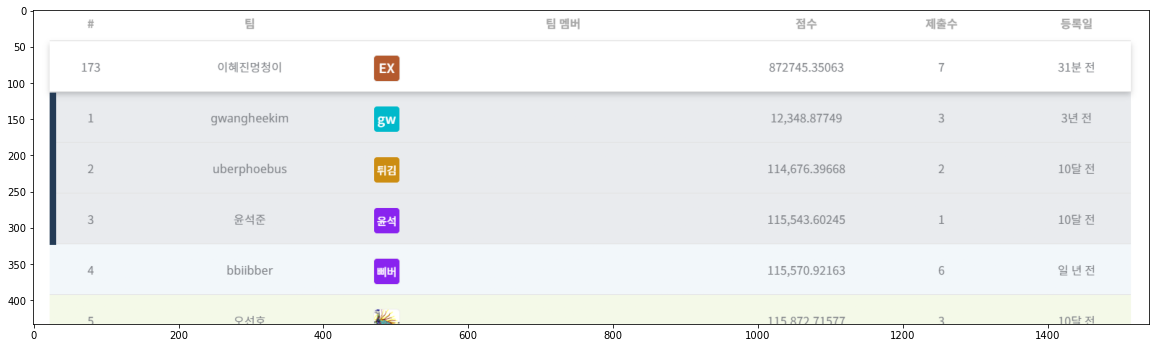

In [712]:
# 173 / 448
# GBR 모델
img_color2 = plt.imread('C:/Users/ss/Desktop/11주_4조/data/등수.PNG')
plt.figure(figsize=(20,10))
plt.imshow(img_color2)
plt.show()

### train data[target 제외] 가져오기

In [50]:
ffdf = pd.read_csv('C:/Users/ss/Desktop/11주_4조/data/FIFA_train(test용).csv', encoding='utf-8')

In [51]:
for column_name in ffdf.columns:
    if ffdf[column_name].dtype == object:
        ffdf[column_name] = le.fit_transform(ffdf[column_name])
    else:
        pass

In [52]:
ffdf = ss.transform(ffdf.iloc[:,2:])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [53]:
train_test = prmodel.predict(ffdf)
train_test

NameError: name 'prmodel' is not defined

In [562]:
pre_target = prmodel.predict(train_input_scaled)

In [553]:
pd.DataFrame(train_test).to_csv('train_test.csv')

In [554]:
ffdf

array([[ 1.25680114,  1.6055065 ,  2.21072753, ...,  3.96384184,
         3.70491559,  2.06664611],
       [ 0.39235715, -0.18214255,  1.42094512, ...,  3.52155563,
         3.53612484, -1.82636376],
       [ 1.25680114,  1.6055065 ,  2.21072753, ...,  3.52155563,
         3.19854334,  0.76897615],
       ...,
       [-1.55264182,  1.6055065 ,  2.21072753, ..., -2.96530876,
        -1.35880687, -0.52869381],
       [-1.55264182, -0.18214255,  2.21072753, ..., -2.96530876,
        -1.19001612, -1.82636376],
       [-1.33653083, -0.18214255,  1.42094512, ..., -2.96530876,
        -1.52759762, -0.52869381]])

In [687]:
pd.DataFrame(rfrmodel.predict(ffdf), columns=['RFR'])

,RFR
0,6.644400e+07
1,6.384400e+07
2,6.921300e+07
3,5.162000e+07
4,6.227100e+07
...,...
8927,1.216597e+05
8928,8.468867e+04
8929,1.017158e+05
8930,9.125826e+04


In [689]:
pd.DataFrame(prmodel.predict(ffdf), columns=['PR'])

,PR
0,1.605832e+08
1,9.489607e+07
2,7.841772e+07
3,7.298386e+07
4,1.008184e+08
...,...
8927,3.002149e+04
8928,1.903069e+04
8929,1.912774e+04
8930,1.862214e+04


In [690]:
pd.DataFrame(gbrmodel.predict(ffdf), columns=['GBR'])

,GBR
0,7.934478e+07
1,7.252366e+07
2,7.968600e+07
3,4.966022e+07
4,6.837297e+07
...,...
8927,4.460033e+04
8928,4.953802e+04
8929,3.076791e+04
8930,1.873516e+04


In [691]:
pd.DataFrame(hgbrmodel.predict(ffdf), columns=['HGBR'])

,HGBR
0,6.764153e+07
1,6.267353e+07
2,6.962717e+07
3,5.561625e+07
4,5.854628e+07
...,...
8927,8.020016e+04
8928,4.522384e+04
8929,2.626858e+04
8930,6.046428e+04


In [26]:
from sklearn.metrics import * 

mean_squared_error(targetdf, hgbrmodel.predict(ffdf))

In [29]:
targetdf = pd.read_csv('C:/Users/ss/Desktop/11주_4조/data/FIFA_train.csv', encoding='utf-8')

In [30]:
targetdf = targetdf.iloc[:,-1]

In [31]:
targetdf = targetdf.to_numpy()

### 오차 계산

In [59]:
# HistGradientBoostingRegressor
mean_absolute_error(targetdf, hgbrmodel.predict(ffdf))

155114.76423333585

In [720]:
# PoissonRegressor
mean_absolute_error(targetdf, prmodel.predict(ffdf))

441264.1105247935

In [69]:
# GradientBoostingRegressor
mean_absolute_error(targetdf, gbrmodel.predict(ffdf))

176173.53031699767

In [718]:
# RandomForestRegressor
mean_absolute_error(targetdf, rfrmodel.predict(ffdf))

218483.50749053358

#### 최적 모델에 실제 train 자료를 넣어 확인한 결과값

### R SQUARED

In [716]:
# HistGradientBoostingRegressor
hgbrmodel.score(ffdf,targetdf)

0.9874165953425238

In [715]:
# RandomForestRegressor
rfrmodel.score(ffdf,targetdf)

0.9795571544007093

In [713]:
# GradientBoostingRegressor
gbrmodel.score(ffdf,targetdf)

0.9926922512407945

In [714]:
# PoissonRegressor
prmodel.score(ffdf,targetdf)

0.9794041756236831